<a href="https://colab.research.google.com/github/CesarRoaldes/satellite_imagery/blob/master/notebook/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Premier modèle**

Etape 1 : Mettre en place le GPU

In [0]:
import torch
import tensorflow as tf

Pour activer le GPU : Edit / Notebook Settings / Hardware Accelerator = GPU (ou TPU)

In [16]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [17]:
!nvidia-smi

Sat Apr  4 13:08:39 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    27W / 250W |     10MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

Etape 2 : Migration des images sur le Google Drive

- Il faut créer un dossier data dans le menu Files
- Ensuite on vient importer les bases de donnée data_ezzor.csv et images_label_ezzor
- On importe finalement quelques images d'Ezzor afin de tester la validité du modèle

In [0]:
import pandas as pd

In [22]:
data_ezzor = pd.read_csv("./data/process/images_label_ezzor.csv")
data_ezzor.head(3)

,centroide,zone,image,label
0,POINT (40.14007831183891 35.30051069500007),"POLYGON ((40.13927324720892 35.29991780962457,...",ezzor_40.140078311838906_35.30051069500007.jpg,0
1,POINT (40.14168844109887 35.30051069500007),"POLYGON ((40.14088337646889 35.29991780962457,...",ezzor_40.14168844109887_35.30051069500007.jpg,0
2,POINT (40.14329857035884 35.30051069500007),"POLYGON ((40.14249350572885 35.29991780962457,...",ezzor_40.14329857035884_35.30051069500007.jpg,0


Etape 3 : Préparation des données et mise en place du modèle  
Lien vers le tutoriel : [ici](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html)

In [0]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()   # interactive mode

### **Load Data**

In [36]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        # transforms.RandomResizedCrop(600),
        # transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        # transforms.Resize(256),
        # transforms.CenterCrop(224),
        transforms.ToTensor(),
        # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/content/data/images/'

# image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
#                                           data_transforms[x])
#                   for x in ['val', 'train']}

image_datasets = {'train': datasets.ImageFolder(os.path.join(data_dir, 'val'), data_transforms['val'])}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}

# dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

# class_names = image_datasets['train'].classes

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

RuntimeError: ignored

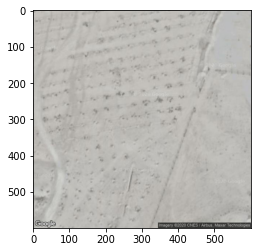

In [33]:
plt.imshow(imageio.imread("/content/data/images/train/ezzor_40.09016430477997_35.320668797766835.jpg"))

In [0]:
!rm -rf /content/data/images/